# Codigo - Proyecto : Modelo de Ramsey

MA4703 – Control Óptimo: Teoría y Laboratorio

Profesor: Héctor Ramírez C.
Auxiliar: Diego Olguín Wende 
Ayudantes: Carlos Antil y Luis Fuentes Cruz

**Integrantes Grupo 1:**
1. Allen Arroyo
2. Isidora Miranda 

In [275]:
import Pkg
Pkg.add("JuMP")
Pkg.add("DifferentialEquations")
Pkg.add("Ipopt")
Pkg.add("LinearAlgebra")
Pkg.add("OptimalControl")
Pkg.add("NLPModelsIpopt")
Pkg.add("Plots")
#Pkg.add("BenchmarkTools")
Pkg.add("Interpolations")
#Pkg.add("QuadGK")
Pkg.add("CairoMakie")
Pkg.add("PlotUtils")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

In [397]:
import Pkg

using JuMP
using DifferentialEquations
using Ipopt, LinearAlgebra
using OptimalControl
using NLPModelsIpopt
using Plots
#using BenchmarkTools

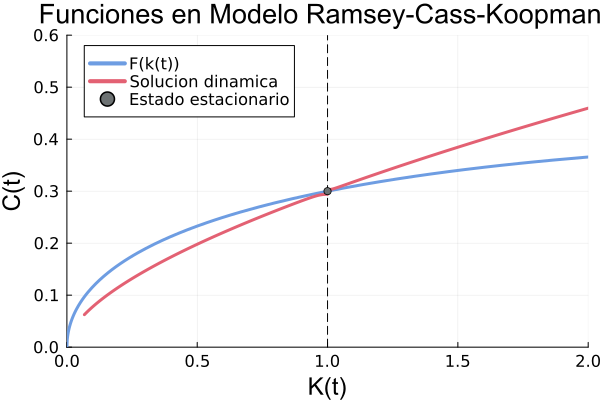

In [427]:
### using DifferentialEquations
using Plots


n=0
# Parámetros como vector
p = [0.4, 0.5, 0.1, 0.1, 0.5]  # A, α, δ, ρ, σ

"""Neoclassical Production Function"""
function F(x, p::Vector)
    A, α, δ, _, _ = p
    return (A * x^α - (n+δ) * x)
end

"""The Ramsey-Cass-Koompans system"""
function ramsey!(du, u, p::Vector, t)
    # Parámetros del vector
    A, α, δ, ρ, σ = p

    # Variables
    K, C = u

    # Sistema ODE, donde
    #K'=F(k)- δK - C
    
    du[1] = -(A * K^α - (δ+n) * K - C)
    du[2] = -(α * A * K^(α - 1) -(δ) - ρ) * (σ) * C

    nothing
end

"""Calcular el estado estacionario"""
function ss(p::Vector)
    # Parámetros del vector
    A, α, δ, ρ, _ = p

    # Estado estacionario
    Kss = (α * A / (δ + ρ))^(1 / (1 - α))
    Css = A * Kss^α - (δ+n) * Kss

    return Kss, Css
end

# Estado estacionario
Kss, Css = ss(p)

# Ejecutar "hacia atrás" | iniciar por debajo del estado estacionario
tspan = (0.0, 50)
tweak = 0.98
u0 = [0.999999 * Kss; 0.999999 * tweak * Css]
ode = ODEProblem(ramsey!, u0, tspan, p)
sol1 = DifferentialEquations.solve(ode, abstol=1e-8, reltol=1e-8)

# Función de política C = ϕ(K)
plt = plot(
    title="Funciones en Modelo Ramsey-Cass-Koopmans",
    xlims=(0, 2 * Kss),
    ylims=(0, 2 * Css),
    xlabel="K(t)",
    ylabel="C(t)",
)

# Dibujar nullclines
plot!(plt, x -> F(x, p), 0, 2, color=:"#6E9DE2" , linewidth=3, label="F(k(t))",titlefont = ("Arial", 18, :bold),legendfontsize = 11, guidefont = ("Arial", 16),tickfontsize = 11)
vline!(plt, [Kss], color=:black, linewidth=1,label=nothing,linestyle=:dash)

plot!(plt, sol1, xflip=false, vars=(1, 2), xlims=(0, 2 * Kss), ylims=(0, 2 * Css), color=:"#E36173", linewidth=3,label="Solucion dinamica",legendfontsize = 11)

# Ejecutar "hacia atrás" | iniciar por encima del estado estacionario
tspan = (0, 100.0)
tweak = 1.01
u0 = [1.00001 * Kss; 1.00001 * tweak * Css]
ode = ODEProblem(ramsey!, u0, tspan, p)
sol2 = DifferentialEquations.solve(ode, abstol=1e-8, reltol=1e-8)
plot!(plt, sol2, xflip=false, vars=(1, 2), xlims=(0, 2 * Kss), ylims=(0, 2 * Css), color=:"#E36173", linewidth=3, label=nothing)

# Estetica grafico :  
scatter!((1.0, 0.3), label=["Estado estacionario" "."], color=:"#6D7273")

#savefig(plt, "ramsey-stable-arm.png")


In [399]:
K1_nuevo(t) = sol1(50-t)[1]
C1_nuevo(t) = sol1(50-t)[2]

C1_nuevo (generic function with 1 method)

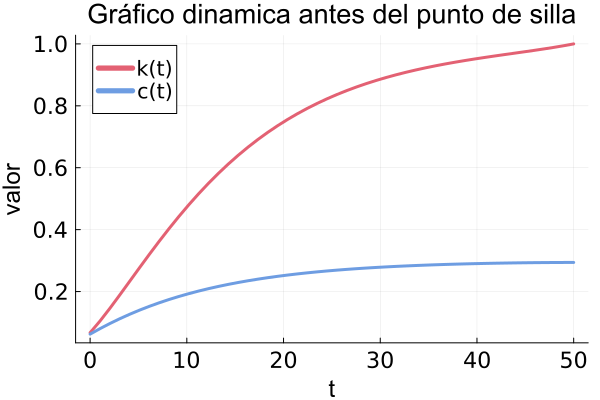

In [400]:
t1_values = range(0, stop=50, length=50)

K1_values = [K1_nuevo(t) for t in t_values]
C1_values = [C1_nuevo(t) for t in t_values]

plot(t1_values, K1_values, label="k(t)", xlabel="t", ylabel="valor", title="Gráfico dinamica antes del punto de silla", color = "#E36173", linewidth=3,titlefont = ("Arial", 18, :bold),legendfontsize = 14, guidefont = ("Arial", 16),tickfontsize = 15)
plot!(t1_values, C1_values, label="c(t)",color = "#6E9DE2", linewidth=3,legendfontsize = 14)


In [401]:
K2_nuevo(t) = sol2(100-t)[1]
C2_nuevo(t) = sol2(100-t)[2]

C2_nuevo (generic function with 1 method)

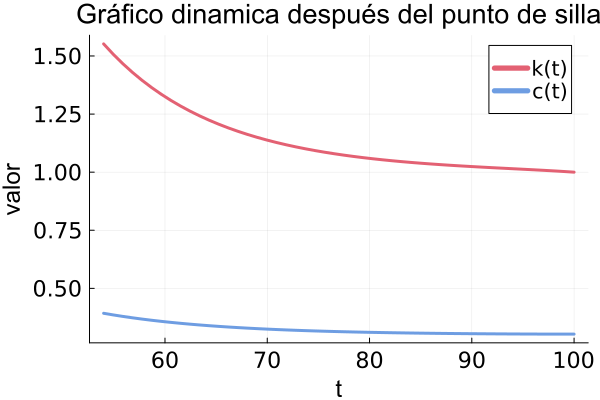

In [402]:
t2_values = range(54, stop=100, length=50)
K2_values = [K2_nuevo(t) for t in t2_values]
C2_values = [C2_nuevo(t) for t in t2_values]

plot(t2_values, K2_values, label="k(t)", xlabel="t", ylabel="valor", title="Gráfico dinamica después del punto de silla", color = "#E36173", linewidth=3,titlefont = ("Arial", 18, :bold),legendfontsize = 14, guidefont = ("Arial", 16),tickfontsize = 15)
plot!(t2_values, C2_values, label="c(t)",color = "#6E9DE2", linewidth=3,legendfontsize = 14)


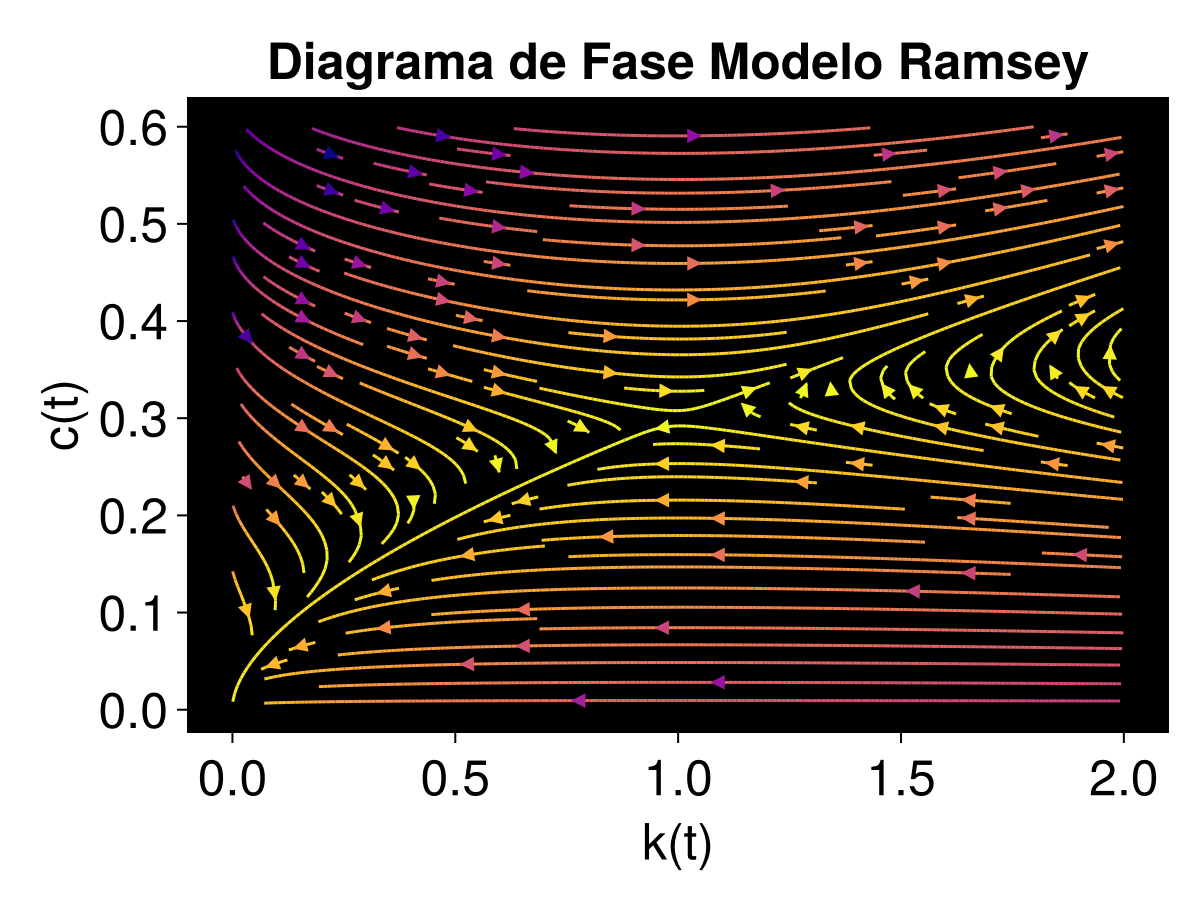

CairoMakie.Screen{IMAGE}


In [403]:
using CairoMakie
p = [0.4, 0.5, 0.1, 0.1, 0.5]  # A, α, δ, ρ, σ

"""Ramsey model equations as points in (K,C) space"""
function ramseyEq(K, C, p)
    A, α, δ, ρ, σ = p[1], p[2], p[3], p[4], p[5]

    dK = -(A * K^α - (δ+n) * K - C)
    dC = -(α * A * K^(α - 1) -(δ) - ρ) * σ * C
    return Point(dK, dC)
end

let
    fig = Figure(fontsize = 25)
    ax = Axis(fig, xlabel="k(t)", ylabel="c(t)", title="Diagrama de Fase Modelo Ramsey", backgroundcolor = :black)
    streamplot!(ax, (x,y)->ramseyEq(x,y,p), 0..2*Kss, 0..2*Css, colormap = Reverse(:plasma),
        gridsize= (32,32), arrow_size = 10)
    fig[1, 1] = ax
    display(fig)
    save("ramsey-streamplot.png", fig)
end

In [426]:
using DifferentialEquations, Random


# Definir el sistema de ecuaciones como en tu código
function ramsey!(du, u, p::Vector, t)
    A, α, δ, ρ, σ = p
    K, C = u
    du[1] = -(A * K^α - (δ + n) * K - C)  # Ecuación para K'
    du[2] = -(α * A * K^(α - 1) - (δ) - ρ) * (σ) * C  # Ecuación para C'
    nothing
end

# Función para el estado estacionario (debe ser cero)
function ss(p::Vector, n)
    A, α, δ, ρ, _ = p

    # Verificar que los parámetros permitan estado estacionario cero
    # Estado estacionario K=0 implica que la ecuación para K' sea 0
    if A * 0^α - (δ + n) * 0 - 0 == 0
        return 0, 0  # Kss = 0, Css = 0
    else
        return nothing, nothing
    end
end

# Generar parámetros válidos para tener el estado estacionario en cero
function generate_parameters(max_tries=1000)
    for _ in 1:max_tries
        # Generar valores aleatorios dentro de un rango razonable
        A = rand(0.5:0.1:2.0)
        α = rand(0.3:0.1:0.7)
        δ = rand(0.01:0.01:0.1)
        ρ = rand(0.01:0.01:0.1)
        σ = rand(1.0:0.1:2.0)
        n = rand(0.01:0.01:0.05)
        
        p = [A, α, δ, ρ, σ]
        Kss, Css = ss(p, n)
        if Kss == 0 && Css == 0  # Asegurarse que el estado estacionario es 0, 0
            return p, n, Kss, Css
        end
    end
    error("No se encontró un conjunto válido de parámetros en $max_tries intentos.")
end

# Probar la generación de parámetros
p, n, Kss, Css = generate_parameters()
println("Parámetros válidos encontrados:")
println("p = $p, n = $n")
println("Kss = $Kss, Css = $Css")


Parámetros válidos encontrados:
p = [0.7, 0.4, 0.1, 0.08, 1.6], n = 0.03
Kss = 0, Css = 0


In [422]:


# Ejecutar "hacia atrás" | iniciar por debajo del estado estacionario
tspan = (0.0, 100)
tweak = 0.98
u0 = [0.999999 * Kss1; 0.999999 * tweak * Css1]
ode = ODEProblem(ramsey!, u0, tspan, p1)
sol3 = DifferentialEquations.solve(ode, abstol=1e-8, reltol=1e-8)

# Función de política C = ϕ(K)
plt = plot(
    title="Funciones en Modelo Ramsey-Cass-Koopmans",
    xlims=(0, 2 * Kss1),
    ylims=(0, 2 * Css1),
    xlabel="K(t)",
    ylabel="C(t)",
)

# Dibujar nullclines
plot!(plt, x -> F(x, p1), 0, 2, color=:"#6E9DE2" , linewidth=3, label="F(k(t))",titlefont = ("Arial", 18, :bold),legendfontsize = 11, guidefont = ("Arial", 16),tickfontsize = 11)
vline!(plt, [Kss1], color=:black, linewidth=1,label=nothing,linestyle=:dash)

plot!(plt, sol3, xflip=false, vars=(1, 2), xlims=(0, 2 * Kss1), ylims=(0, 2 * Css1), color=:"#E36173", linewidth=3,label="Solucion dinamica",legendfontsize = 11)

# Ejecutar "hacia atrás" | iniciar por encima del estado estacionario
tspan = (0, 200.0)
tweak = 1.01
u0 = [1.00001 * Kss1; 1.00001 * tweak * Css1]
ode = ODEProblem(ramsey!, u0, tspan, p1)
sol4 = DifferentialEquations.solve(ode, abstol=1e-8, reltol=1e-8)
plot!(plt, sol4, xflip=false, vars=(1, 2), xlims=(0, 2 * Kss1), ylims=(0, 2 * Css1), color=:"#E36173", linewidth=3, label=nothing)

# Estetica grafico :  
scatter!((1.0, 0.3), label=["Estado estacionario" "."], color=:"#6D7273")

LoadError: DomainError with -1.1878331659216985e-6:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

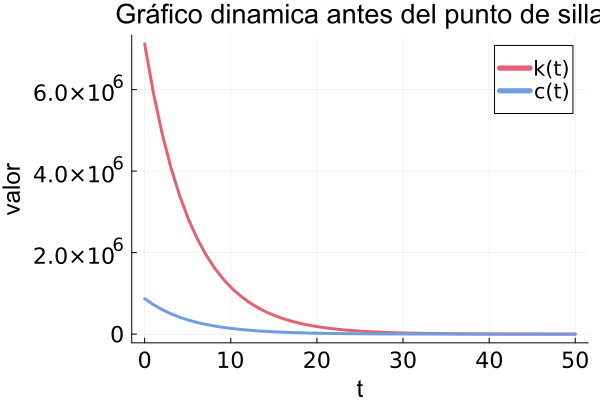

In [423]:
K3_nuevo(t) = sol3(100-t)[1]
C3_nuevo(t) = sol3(100-t)[2]
t3_values = range(0, stop=50, length=50)

K3_values = [K3_nuevo(t) for t in t3_values]
C3_values = [C3_nuevo(t) for t in t3_values]

plot(t3_values, K3_values, label="k(t)", xlabel="t", ylabel="valor", title="Gráfico dinamica antes del punto de silla", color = "#E36173", linewidth=3,titlefont = ("Arial", 18, :bold),legendfontsize = 14, guidefont = ("Arial", 16),tickfontsize = 15)
plot!(t3_values, C3_values, label="c(t)",color = "#6E9DE2", linewidth=3,legendfontsize = 14)


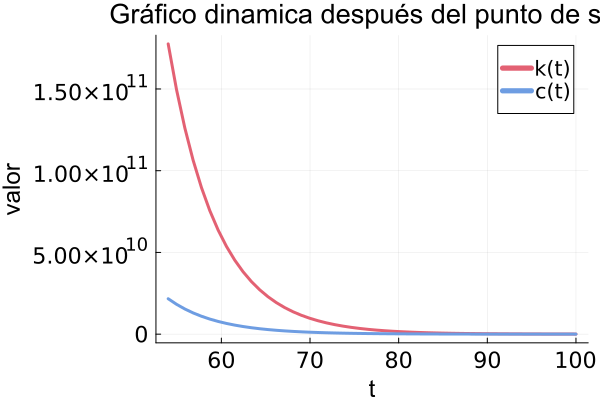

In [424]:
K4_nuevo(t) = sol4(200-t)[1]
C4_nuevo(t) = sol4(200-t)[2]

t4_values = range(54, stop=100, length=50)

K4_values = [K4_nuevo(t) for t in t4_values]
C4_values = [C4_nuevo(t) for t in t4_values]

plot(t4_values, K4_values, label="k(t)", xlabel="t", ylabel="valor", title="Gráfico dinamica después del punto de silla", color = "#E36173", linewidth=3,titlefont = ("Arial", 18, :bold),legendfontsize = 14, guidefont = ("Arial", 16),tickfontsize = 15)
plot!(t4_values, C4_values, label="c(t)",color = "#6E9DE2", linewidth=3,legendfontsize = 14)

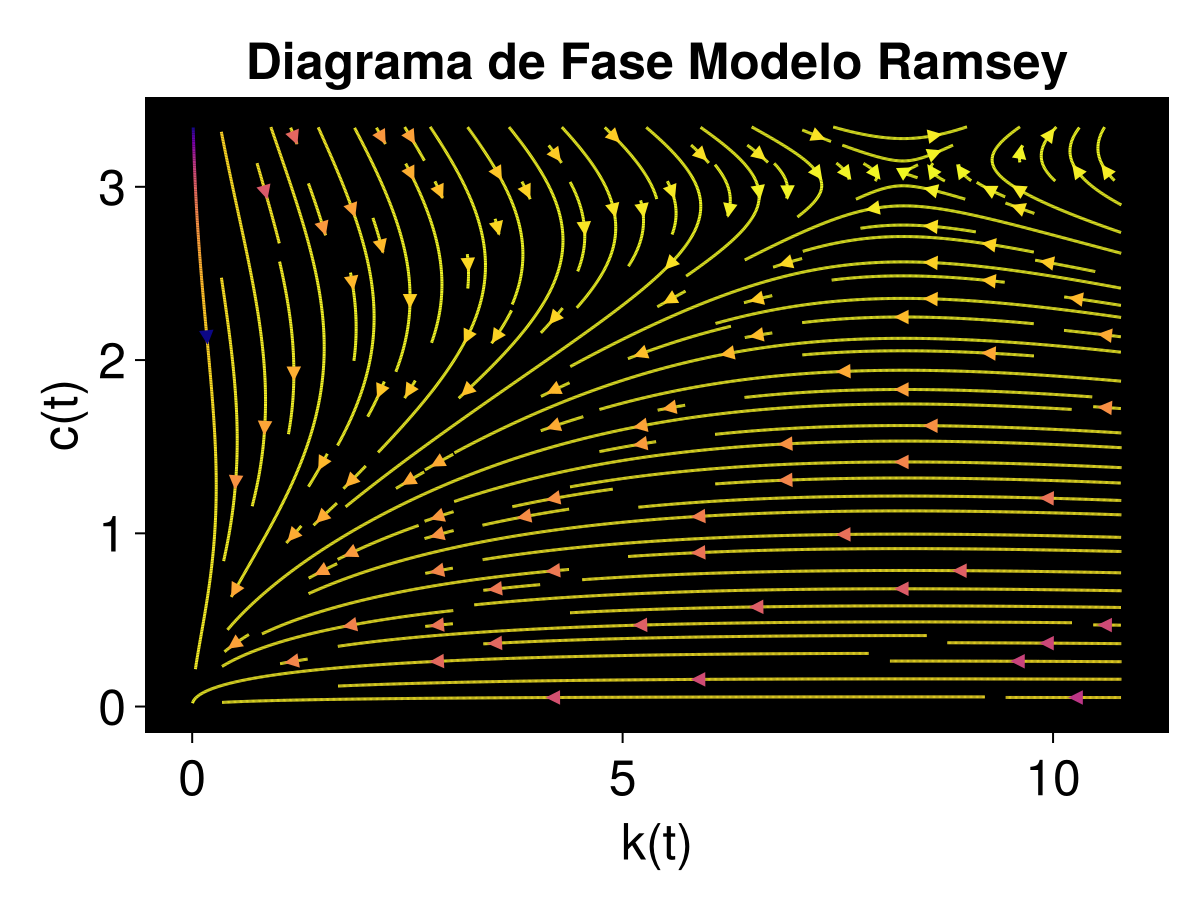

CairoMakie.Screen{IMAGE}


In [425]:
using CairoMakie
p1 = [1.9, 0.3, 0.03, 0.1, 1.4]  # A, α, δ, ρ, σ

"""Ramsey model equations as points in (K,C) space"""
function ramseyEq(K, C, p)
    A, α, δ, ρ, σ = p[1], p[2], p[3], p[4], p[5]

    dK = -(A * K^α - (δ+n) * K - C)
    dC = -(α * A * K^(α - 1) -(δ) - ρ) * σ * C
    return Point(dK, dC)
end

let
    fig = Figure(fontsize = 25)
    ax = Axis(fig, xlabel="k(t)", ylabel="c(t)", title="Diagrama de Fase Modelo Ramsey", backgroundcolor = :black)
    streamplot!(ax, (x,y)->ramseyEq(x,y,p1), 0..2*Kss, 0..2*Css, colormap = Reverse(:plasma),
        gridsize= (32,32), arrow_size = 10)
    fig[1, 1] = ax
    display(fig)
    save("ramsey-streamplot.png", fig)
end